### Ridge Regression and Lasso Regression

In [10]:
from sklearn.datasets import load_boston
import pandas as pd

dataset = load_boston()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['Price'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr_model = LinearRegression()
mse = cross_val_score(lr_model, X, y,scoring='neg_mean_squared_error', cv=5)
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [18]:
import numpy as np

mean_mse = np.mean(mse)
mean_mse

-37.13180746769914

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]} 
ridge_model = GridSearchCV(ridge, params, scoring='neg_mean_squared_error',cv=5 )
ridge_model.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [21]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 100}
-29.871945115432595


In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_model = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

lasso_model.fit(X,y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1}
-35.4912832636271


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


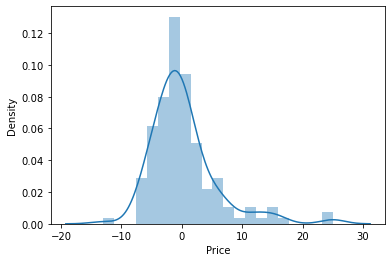

In [30]:
import seaborn as sns

sns.distplot(y_test-y_pred_lasso)

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


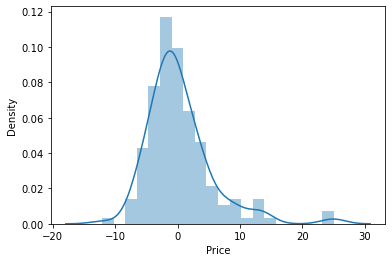

In [31]:
import seaborn as sns

sns.distplot(y_test-y_pred_ridge)

## LinReg Model-3

In [33]:
import os

os.getcwd()
os.chdir("E:\\code\\7.MachineLearningOfficial\\data")

In [45]:
import pandas as pd

df = pd.read_csv("startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [46]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
States = pd.get_dummies(X['State'], drop_first=True)

In [48]:
X = X.drop('State', axis=1)
X = pd.concat([X,States], axis=1).values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
print(len(X_train))
print(len(X_test))

35
15


In [53]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_test_pred = lr_model.predict(X_test)
y_test_pred

array([126187.39411512,  85788.82259489,  99777.0281516 ,  45706.12238325,
       127062.20722787,  51891.83884402, 109114.62977498, 100600.61123707,
        97953.99874703, 111730.57706801, 128818.49200667, 174195.35772603,
        93736.28538393, 148381.04097174, 172313.87139381])

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test, y_test_pred)

0.9397108063368201

In [62]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse

9210.154995090326

In [64]:
std = np.std(y_test)
std

37510.01183325321

In [65]:
rmse<std

True

## Multi collinearity within the independent features

In [67]:
import pandas as pd

df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [74]:
import statsmodels.api as sms

X = sms.add_constant(X)
model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.58e-96
Time:                        19:26:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X.iloc[:,1:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


Example2:

In [78]:
import pandas as pd

df = pd.read_csv('salary_data.csv', sep='\t')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [79]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [80]:
import statsmodels.api as sms

X = sms.add_constant(X)
model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.35e-19
Time:                        19:33:53   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X.iloc[:,1:].corr()

,YearsExperience,Age
YearsExperience,1.000000,0.987258
Age,0.987258,1.000000
